In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
SEED = 23455
BATCH_SIZE = 16
DATA_SIZE = 32
LEARNING_RATE = 0.001

In [20]:
# 生成训练数据
rdm = np.random.RandomState(SEED)
X = rdm.rand(DATA_SIZE, 2)
Y_ = [[x1 + x2 + rdm.rand() / 10 - 0.05] for (x1, x2) in X]

In [21]:
# 定义数据节点
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

# 定义计算节点
w1 = tf.Variable(tf.random_normal([2, 3], stddev=1.0, seed=1))
# w2 = tf.Variable(tf.random_normal([3, 1], stddev=1.0, seed=1))
y = tf.matmul(x, w1)

In [22]:
# 定义损失函数
loss_op = tf.reduce_mean(tf.square(y_ - y))

In [23]:
# 定义反向传播过程最小化损失函数
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss_op)

In [24]:
L = []
# 生成回话轮， 训练
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
  

    for i in range(5000):
        start = (i * BATCH_SIZE) % DATA_SIZE
        end = start + BATCH_SIZE
        sess.run(train_op, feed_dict={x: X[start:end], y_: Y_[start:end]})
        loss_value = sess.run(loss_op, feed_dict={x: X, y_: Y_})
        L.append(loss_value)
        if i % 500 == 0:
            print("After %d training steps, w1 is: %g" % (i, loss_value))



After 0 training steps, w1 is: 2.81658
After 500 training steps, w1 is: 0.105713
After 1000 training steps, w1 is: 0.0193969
After 1500 training steps, w1 is: 0.00939883
After 2000 training steps, w1 is: 0.00514526
After 2500 training steps, w1 is: 0.00297205
After 3000 training steps, w1 is: 0.00185009
After 3500 training steps, w1 is: 0.00127054
After 4000 training steps, w1 is: 0.000971164
After 4500 training steps, w1 is: 0.000816518


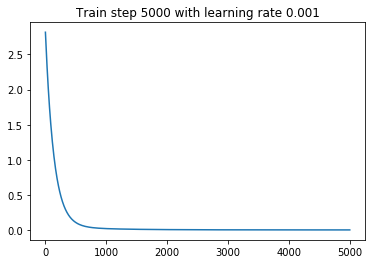

In [25]:
plt.plot(L)
plt.title("Train step %i with learning rate %g" % (len(L), LEARNING_RATE))
plt.show()